In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Load the dataset
file_path = "LoansData.csv"
df = pd.read_csv(file_path)

In [7]:
#changing directory
os.chdir("/Users/usha/Python/4. Basic Statistics - Hypothesis Testing") 


In [14]:
# Data Cleaning and Preprocessing
df['Interest.Rate'] = df['Interest.Rate'].str.rstrip('%').astype('float')
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].str.rstrip('%').astype('float')
df['Loan.Length'] = df['Loan.Length'].str.extract('(\d+)').astype('int')

df['FICO.Score'] = df['FICO.Range'].dropna().str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2)
df['FICO.Score'].fillna(df['FICO.Score'].mean(), inplace=True)  # Replace NaNs with mean FICO score


In [22]:
# Display cleaned data in tabular format
print("Cleaned Data Preview:")
display(df.head(10))  

Cleaned Data Preview:


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Interest.rate,Debt.to.Income.Ratio,Loan.length,FICO.Score
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,8.90,14.90,36,737.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,12.12,28.36,36,717.0
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,21.98,23.81,60,692.0
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,9.99,14.30,36,697.0
4,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,11.71,18.78,36,697.0
5,6000.0,6000.0,15.31,36,other,20.05,CT,OWN,4891.67,670-674,17.0,10391.0,2.0,3 years,15.31,20.05,36,672.0
6,10000.0,10000.0,7.90,36,debt_consolidation,26.09,MA,RENT,2916.67,720-724,10.0,15957.0,0.0,10+ years,7.90,26.09,36,722.0
7,33500.0,33450.0,17.14,60,credit_card,14.70,LA,MORTGAGE,13863.42,705-709,12.0,27874.0,0.0,10+ years,17.14,14.70,60,707.0
8,14675.0,14675.0,14.33,36,credit_card,26.92,CA,RENT,3150.00,685-689,9.0,7246.0,1.0,8 years,14.33,26.92,36,687.0
9,7000.0,7000.0,6.91,36,credit_card,7.10,CA,RENT,5000.00,715-719,8.0,7612.0,0.0,3 years,6.91,7.10,36,717.0


In [24]:
# Remove NaN or infinite values before hypothesis testing
df_clean = df[['Amount.Requested', 'Interest.Rate']].dropna()
df_clean = df_clean[~df_clean.isin([np.inf, -np.inf]).any(axis=1)]

In [25]:
print("Cleaned Data Preview:")
display(df.head(10))  

Cleaned Data Preview:


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Interest.rate,Debt.to.Income.Ratio,Loan.length,FICO.Score
0,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year,8.90,14.90,36,737.0
1,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years,12.12,28.36,36,717.0
2,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years,21.98,23.81,60,692.0
3,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years,9.99,14.30,36,697.0
4,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years,11.71,18.78,36,697.0
5,6000.0,6000.0,15.31,36,other,20.05,CT,OWN,4891.67,670-674,17.0,10391.0,2.0,3 years,15.31,20.05,36,672.0
6,10000.0,10000.0,7.90,36,debt_consolidation,26.09,MA,RENT,2916.67,720-724,10.0,15957.0,0.0,10+ years,7.90,26.09,36,722.0
7,33500.0,33450.0,17.14,60,credit_card,14.70,LA,MORTGAGE,13863.42,705-709,12.0,27874.0,0.0,10+ years,17.14,14.70,60,707.0
8,14675.0,14675.0,14.33,36,credit_card,26.92,CA,RENT,3150.00,685-689,9.0,7246.0,1.0,8 years,14.33,26.92,36,687.0
9,7000.0,7000.0,6.91,36,credit_card,7.10,CA,RENT,5000.00,715-719,8.0,7612.0,0.0,3 years,6.91,7.10,36,717.0


In [26]:
# Hypothesis Testing
# a. Interest rate is varied for different loan amounts
corr, p_value = stats.pearsonr(df_clean['Amount.Requested'], df_clean['Interest.Rate'])
print(f"Correlation between Loan Amount and Interest Rate: {corr}, p-value: {p_value}")


Correlation between Loan Amount and Interest Rate: 0.3324537662008251, p-value: 1.5803794085801672e-65


In [27]:
# b. Loan length is directly affecting interest rate
anova_result = stats.f_oneway(df[df['Loan.Length'] == 36]['Interest.Rate'],
                              df[df['Loan.Length'] == 60]['Interest.Rate'])
print(f"ANOVA Test Result (Loan Length vs Interest Rate): F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA Test Result (Loan Length vs Interest Rate): F-statistic = nan, p-value = nan


In [28]:
# c. Interest rate varies for different purposes of loans
anova_purpose = stats.f_oneway(*[df[df['Loan.Purpose'] == purpose]['Interest.Rate'] for purpose in df['Loan.Purpose'].unique()])
print(f"ANOVA Test Result (Loan Purpose vs Interest Rate): F-statistic = {anova_purpose.statistic}, p-value = {anova_purpose.pvalue}")


ANOVA Test Result (Loan Purpose vs Interest Rate): F-statistic = nan, p-value = nan


In [29]:
# d. Relationship between FICO scores and Home Ownership
fico_home_ownership = df.groupby('Home.Ownership')['FICO.Score'].mean()
print("Average FICO Score by Home Ownership:\n", fico_home_ownership)

Average FICO Score by Home Ownership:
 Home.Ownership
MORTGAGE    713.692158
NONE        802.000000
OTHER       674.000000
OWN         708.550000
RENT        702.061871
Name: FICO.Score, dtype: float64


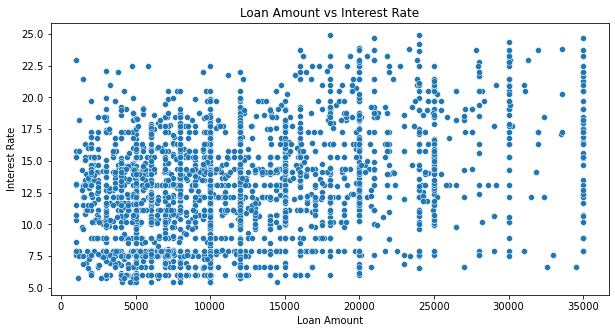

In [30]:
# Visualization
#Loan Amount vs Interest Rate (Scatter Plot)

#This plot visualizes the relationship between loan amount and interest rate.
#If the points show a downward trend, it suggests that higher loan amounts are charged lower interest rates.
#If the points are scattered randomly, it indicates no significant relationship.

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Amount.Requested'], y=df['Interest.Rate'])
plt.title("Loan Amount vs Interest Rate")
plt.xlabel("Loan Amount")
plt.ylabel("Interest Rate")
plt.show()


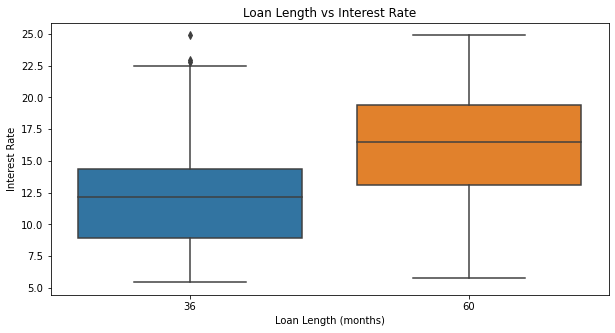

In [33]:
#Loan Length vs Interest Rate (Box Plot)
#This box plot compares interest rates for different loan lengths (e.g., 36 months vs 60 months).
#A noticeable difference in median values suggests that loan length significantly affects interest rates.
#The presence of outliers indicates variability in interest rates for different loan lengths.

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Loan.Length'], y=df['Interest.Rate'])
plt.title("Loan Length vs Interest Rate")
plt.xlabel("Loan Length (months)")
plt.ylabel("Interest Rate")
plt.show()

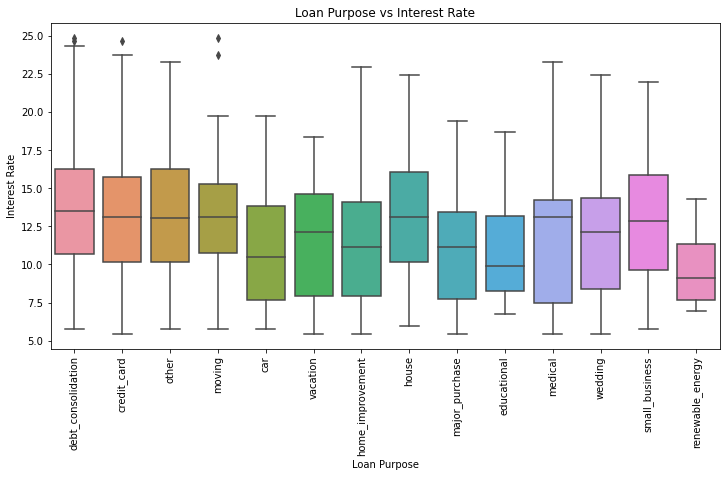

In [32]:
#Loan Purpose vs Interest Rate (Box Plot)

#This visualization examines how interest rates vary based on loan purposes (e.g., credit card refinancing, debt consolidation, home improvement, etc.).
#If some loan purposes have consistently higher or lower interest rates, it indicates a dependency between loan purpose and interest rate.
#The spread (interquartile range) of each category highlights the variability in interest rates.

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Loan.Purpose'], y=df['Interest.Rate'])
plt.xticks(rotation=90)
plt.title("Loan Purpose vs Interest Rate")
plt.xlabel("Loan Purpose")
plt.ylabel("Interest Rate")
plt.show()

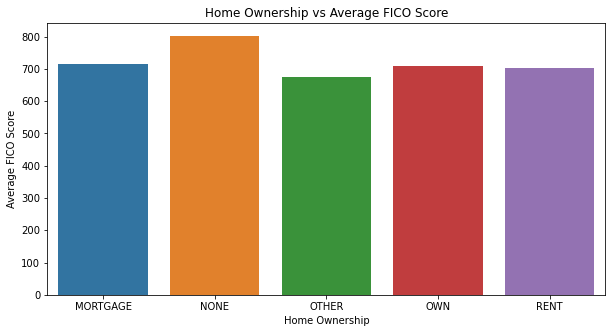

In [34]:
#Home Ownership vs Average FICO Score (Bar Plot)

#This plot shows the average FICO score for different home ownership statuses (own, rent, mortgage).
#A clear increasing or decreasing trend suggests a relationship between home ownership type and creditworthiness (FICO score).
#If homeowners have higher average FICO scores than renters, it supports the hypothesis that owning a home is linked to better credit scores.

plt.figure(figsize=(10, 5))
sns.barplot(x=fico_home_ownership.index, y=fico_home_ownership.values)
plt.title("Home Ownership vs Average FICO Score")
plt.xlabel("Home Ownership")
plt.ylabel("Average FICO Score")
plt.show()
